# Machine Learning in Python - Project 1

Due Friday, March 8th by 4 pm.

Spyridon Dallas,
Kian Pardisi,
Brendan Crowley

# Introduction



Predicting cognitive ability is an endeavor that intertwines complexity with necessity. This report leverages a comprehensive dataset derived from the Survey of Health, Ageing and Retirement in Europe (SHARE), which encompasses a diverse array of variables from demographic to personal behavioral patterns [1]. Our aim is to meticulously analyze these variables to unveil the determinants that may influence cognitive scores among European adults.

Cognitive scores may not simply be interpreted as scores of cognitive ability, but can illustrate a multifaceted relationship between lifestyle choices, environmental factors, and genetic predispositions. The cognitive score, encapsulated by the 'cogscore' variable in our dataset, serves as a proxy for assessing dementia severity. This composite measure combines results from numeracy tests, word recall tests, and an orientation test—a methodology reflective of healthcare practitioners' approach to screening for cognitive impairment [3][4]. While invaluable, the cognitive score is not definitive on its own. Recognizing its limitations is crucial, especially in cases of learning disabilities, sensory impairments, or communication difficulties, where dementia might manifest irrespective of cognitive scores [5]. Thus, while cognitive scores are a significant piece of the puzzle, they require a holistic interpretation alongside clinical judgment, ensuring that dementia diagnosis is comprehensive and inclusive.

This project's objective is to construct a predictive model that goes beyond statistical significance and offers practical insights. Our end goal is to pinpoint which variables are the most significant predictors of cognitive function and, therefore, could be focal points for preventive health measures. Aligned with these criteria, we will also stress the interpretability of the model to make certain that our findings are not only statistically sound but also meaningful.

Throughout this investigation, we chose several models to test, each selected for its potential to determine the patterns of cognitive score. From the foundational linear regression model to polynomial features, our exploration sought to uncover the model that best encapsulates the complexity of our dataset. Moreover, we ventured into the realm of regularization with Ridge, Lasso, and Elastic Net models, aiming to refine our predictions through the lens of feature selection and engineering, as well as dimensionality reduction. This methodical approach set the stage for a comparison based on performance metrics such as MSE, RMSE, and R-squared values. Ultimately, the culmination of these efforts guided us in pinpointing the best model to advance our understanding of cognitive score determinants within the European population.


In [ ]:
# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# scipy modules
from scipy.stats import boxcox

# 2. Exploratory Data Analysis and Feature Engineering

Our study began by examining a dataset with 23 variables. Most variables were numerical, except for one categorical variable ('mergeid') and some binary variables, such as 'yes/no' questions, which were coded as numbers (1 for yes, 5 for no) with the exception of the gender variable 'female' which was encoded to 0 for male and 1 for female.

First we wanted to understand the distribution of each variable, to figure out if any further preprocessing would be needed. We therefore plotted histograms for all of them, and it was readily evident that some of them were right skewed (e.g. bmi), whereas some others were left skewed (e.g. casp). Due to this fact, we would perhaps need to explore Box-Cox transformation for these variables (perhaps log for the right skewed and square for the left skewed).

Secondly, we wanted to understand the relationship between the cognitive score variable and the set of the predictor variables together with the strength of this relationship. We therefore found the correlation between the variables and plotted them in a heatmap. 

Looking at how each variable relates to the cognitive score, by calculating correlations and showing them in a heatmap, we found that education level, years of education, quality of life, depression level, physical activity, whether the person helps others, number of chronic diseases, and drinking behavior had the strongest links with cognitive score, with age as well. These findings hinted at only a fraction of variables (9 out of 23) showcasing a substantial correlation with cognitive scores, suggesting that the underlying relationships might be inherently non-linear.

Before diving deeper, we split our data into an 80% training set and a 20% test set. This split aided in ensuring the chosen model could be optimised for unseen data.

In preparing our data for modeling, we removed NaNs, duplicates, and checked if there were any peculiar numerical values that would lead to infinite sums.

No additional data were extracted.


### 2.1 Exploratory data analysis

As a first step, we wanted to gain a general idea of the data at hand, their type, and if there were any erroneous entries or missing values.

In [ ]:
# Load data in easyshare.csv
raw_dementia_data = pd.read_csv("easyshare.csv")
raw_dementia_data.head()

,mergeid,int_year,wave,country,country_mod,female,age,birth_country,citizenship,isced1997_r,...,bmi2,smoking,ever_smoked,br010_mod,br015_,casp,chronic_mod,sp008_,ch001_,cogscore
0,AT-000674-01,2011.0,4.0,11.0,40.0,1.0,59.700001,40.0,40.0,5.0,...,2.0,5.0,5.0,5.0,1.0,44.0,1.0,5.0,2.0,8.0
1,AT-001215-01,2011.0,4.0,11.0,40.0,1.0,72.599998,528.0,528.0,5.0,...,3.0,1.0,1.0,2.0,1.0,35.0,6.0,1.0,0.0,14.5
2,AT-001492-01,2011.0,4.0,11.0,40.0,1.0,59.599998,40.0,40.0,3.0,...,2.0,5.0,1.0,7.0,2.0,43.0,1.0,5.0,6.0,18.5
3,AT-001492-02,2011.0,4.0,11.0,40.0,0.0,59.799999,40.0,40.0,4.0,...,2.0,1.0,1.0,7.0,3.0,47.0,1.0,NaN,6.0,24.0
4,AT-001816-01,2004.0,1.0,11.0,40.0,1.0,61.299999,40.0,40.0,3.0,...,2.0,5.0,1.0,4.0,3.0,43.0,0.0,5.0,2.0,20.0


In [ ]:
raw_dementia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mergeid        97372 non-null  object 
 1   int_year       97372 non-null  float64
 2   wave           97372 non-null  float64
 3   country        97372 non-null  float64
 4   country_mod    97372 non-null  float64
 5   female         97372 non-null  float64
 6   age            97372 non-null  float64
 7   birth_country  97170 non-null  float64
 8   citizenship    97281 non-null  float64
 9   isced1997_r    97372 non-null  float64
 10  eduyears_mod   84532 non-null  float64
 11  eurod          95838 non-null  float64
 12  bmi            94686 non-null  float64
 13  bmi2           94686 non-null  float64
 14  smoking        96887 non-null  float64
 15  ever_smoked    97116 non-null  float64
 16  br010_mod      79210 non-null  float64
 17  br015_         97113 non-null  float64
 18  casp  

It became evident that all data had numerical values, with the exception of the survey participant identification code 'mergeid'. Categorical data were already pre-processed and encoded with numbers, with supportive legends found in [1]. We decided to first select the variables with which we would want to work and then remove any duplicates or NaNs, so as to remove as few rows as possible.

In [ ]:
# First check for duplicated values
print(raw_dementia_data.duplicated().sum())

975


In [ ]:
# Remove duplicates as they will not be useful in the EDA 
raw_dementia_data.drop_duplicates(inplace=True)

# Remove the columns 'mergeid', remove duplicate 'country' column 
# which just holds different encoding.
raw_dementia_data = raw_dementia_data.drop(['mergeid','country'], axis = 1)

Subsequently, we wanted to visualise the data to facilitate better understanding and check their primary correlation trends. Therefore, their histograms were plotted, their correlation was found, and a heatmap of their correlation matrix was plotted as well.

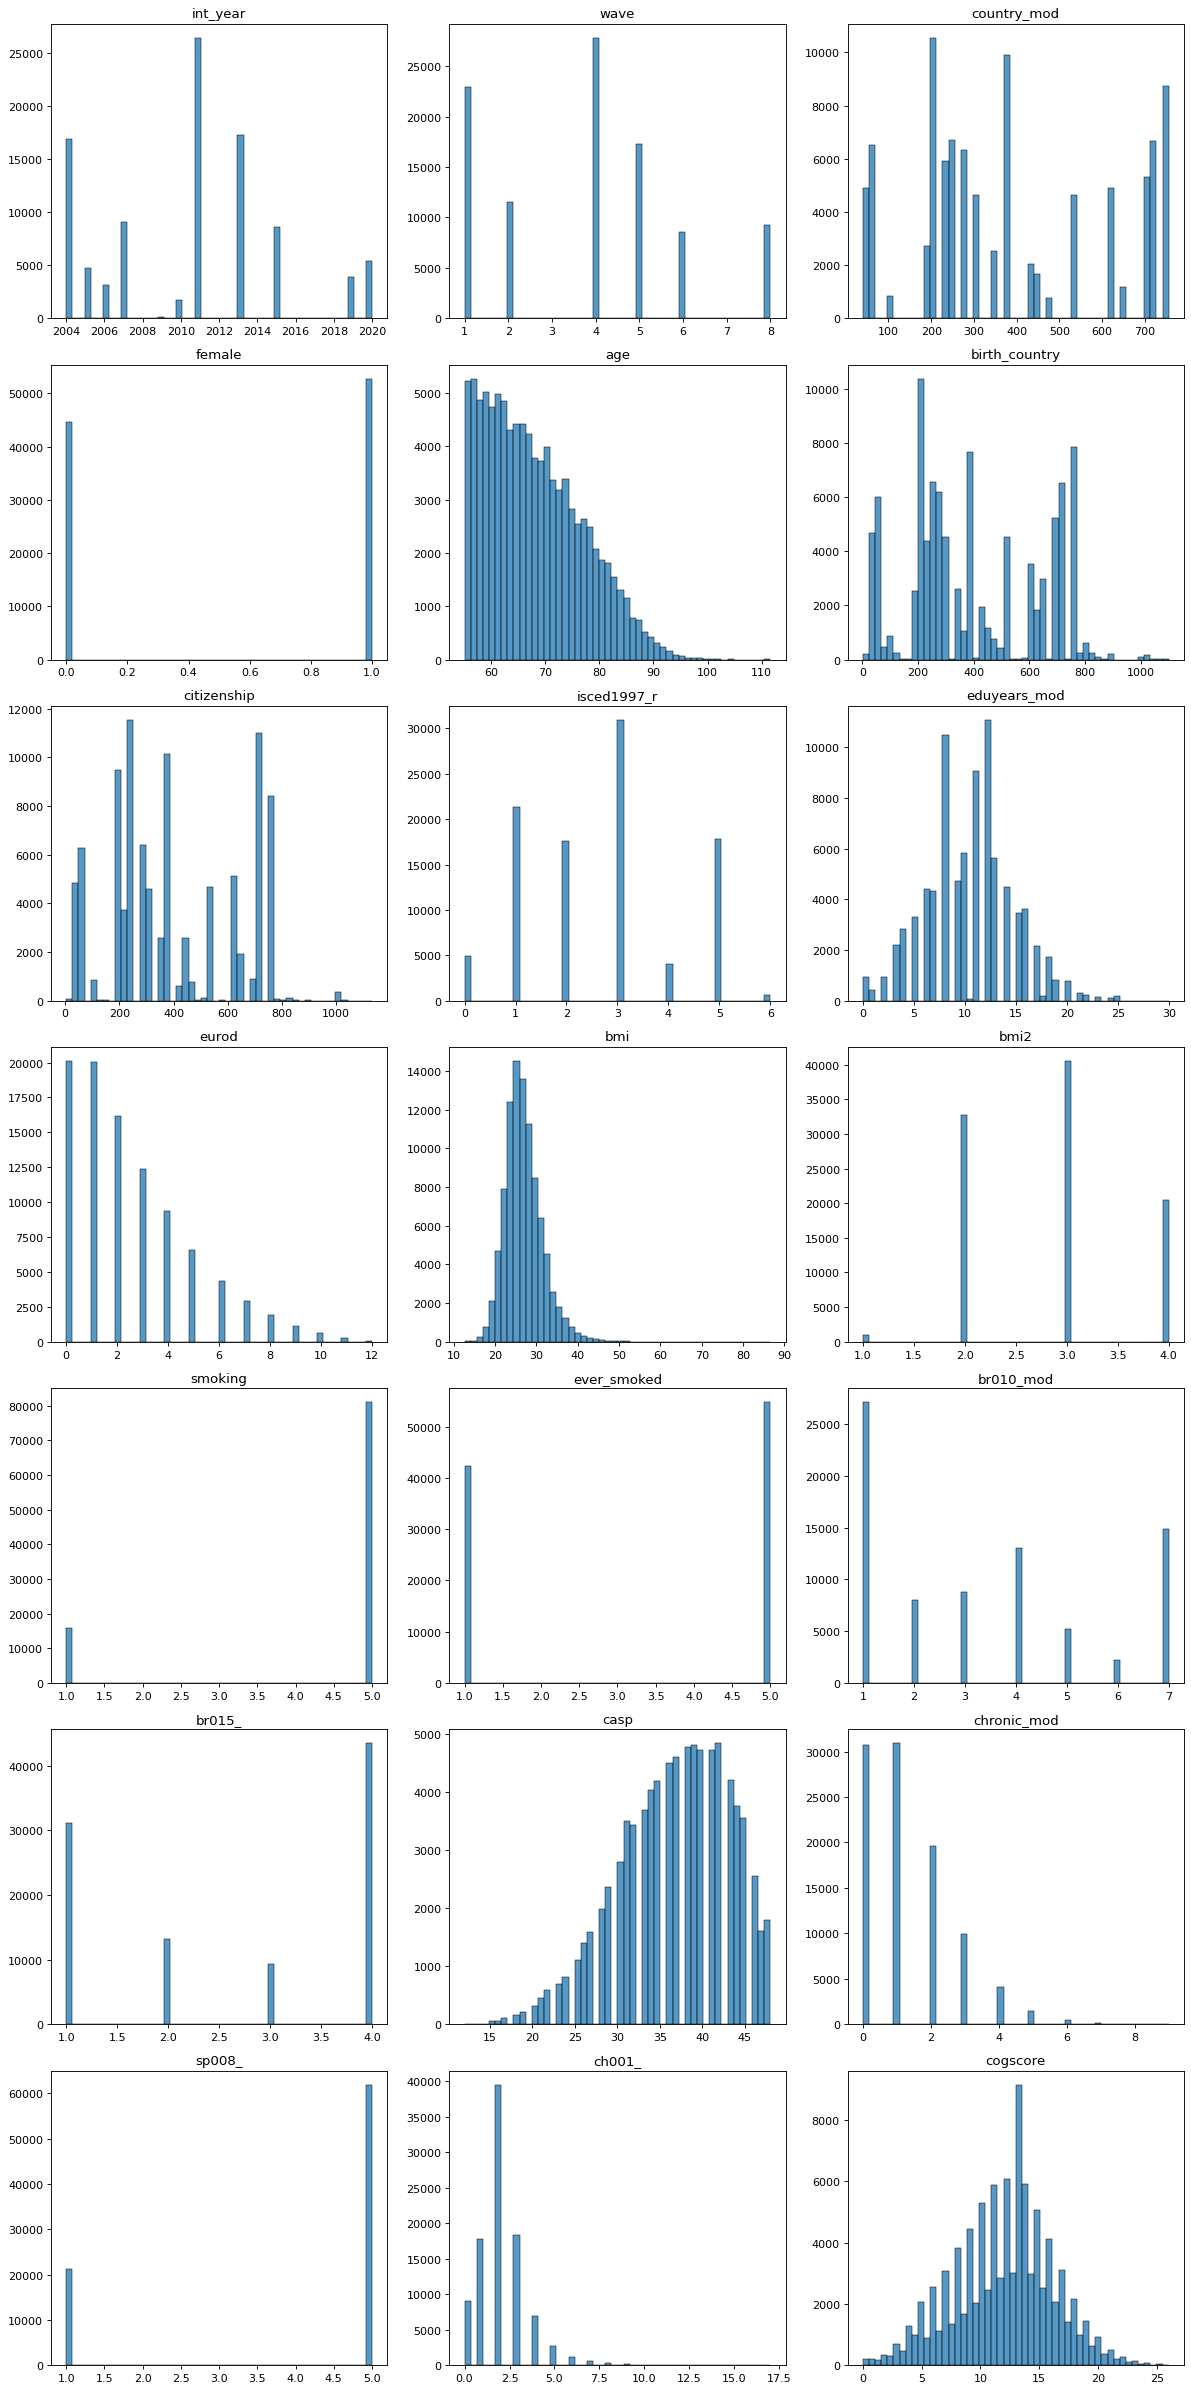

In [ ]:
# Adjust plotting params
fig, axes = plt.subplots(figsize=(15, 30), ncols=3, nrows=7)
axes = axes.flatten()


# Plot histograms of variables
for i, ax in enumerate(axes):
    sns.histplot(data = raw_dementia_data.iloc[:, i], bins=50, ax=ax)
    ax.set_title(raw_dementia_data.iloc[:,i].name)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

It was readily noticeable that the variables bmi and ch001_ were right skewed, and the variable casp was left skewed. Furthermore, it was noted that no observations went to infinity or otherwise showed an unexpected behavior.

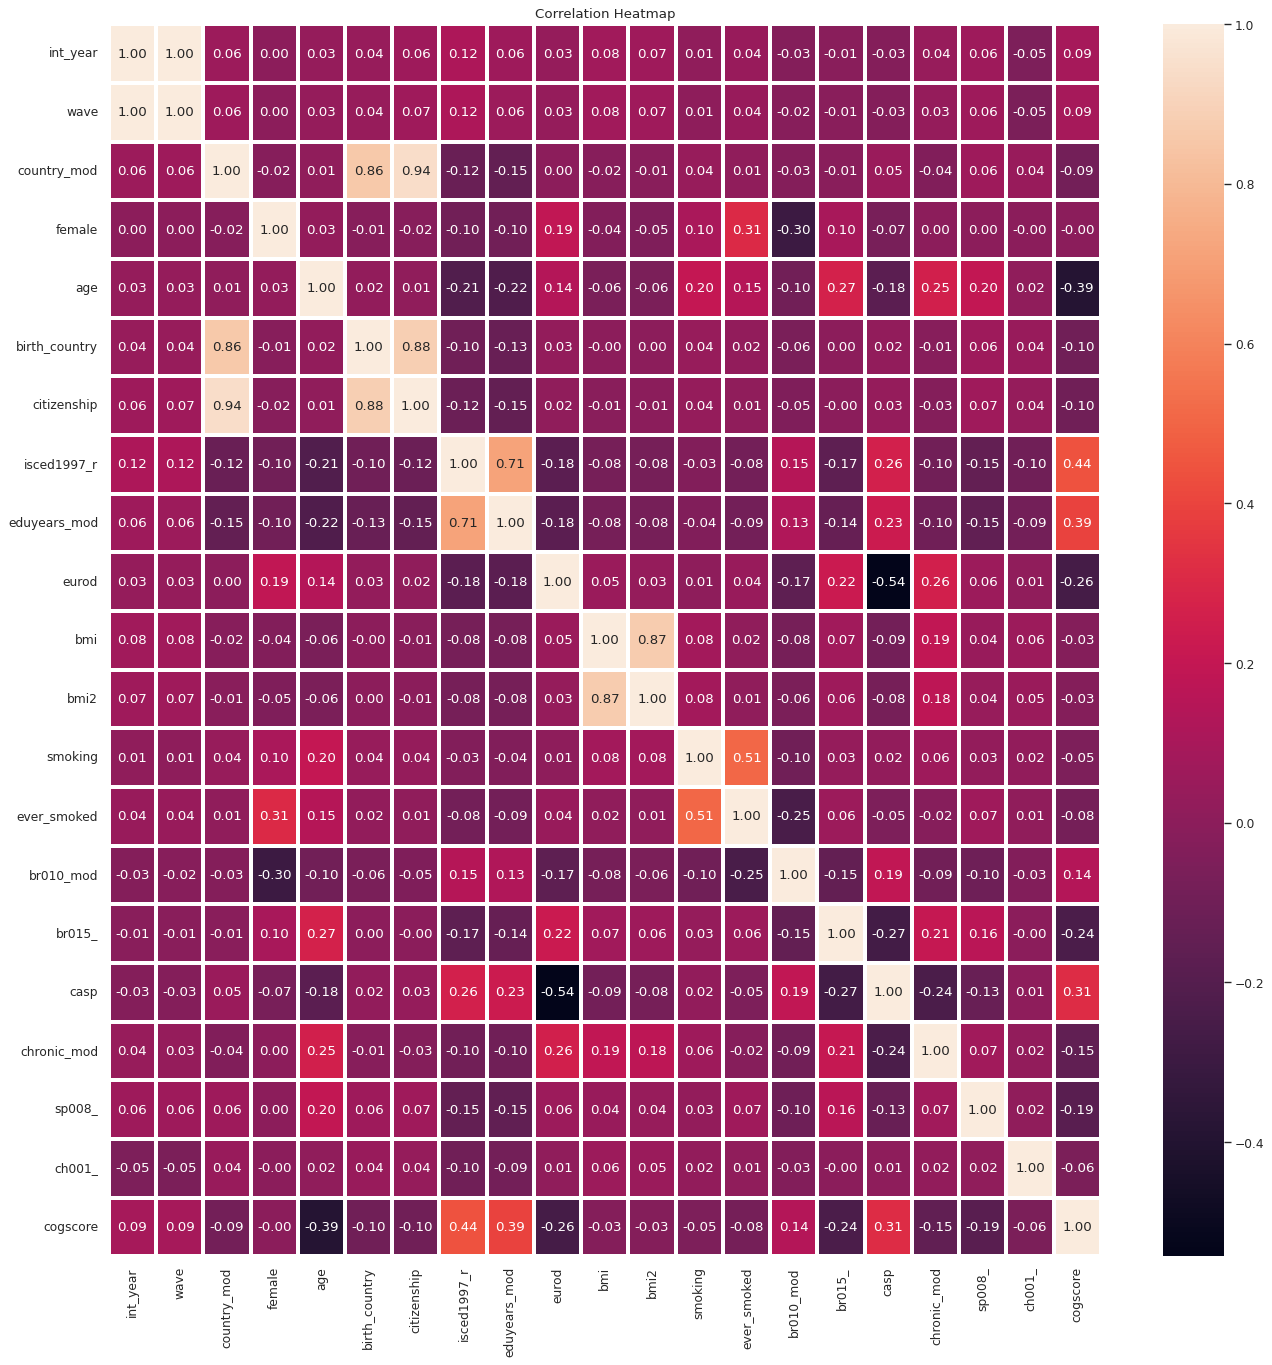

In [ ]:
# Correlation map
corr_matx = raw_dementia_data.corr()
sns.set(rc={'figure.figsize': (20, 20)})
sns.heatmap(corr_matx, annot = True, fmt = '.2f', linewidths = 2)
plt.title("Correlation Heatmap")
plt.show()

The following variables were found to have the strongest correlations with the cognitive score variable:

    1. isced_1997_r (level of education): 0.44, high education = higher cogscore
    2. eduyears_mod (years of education): 0.39, many years of education = higher cogscore
    3. age: -0.39, the older the person = lower cogscore
    4. casp (quality of life): 0.31, high life quality = higher cogscore
    5. eurod (depression scale): -0.26,  high depression = lower cogscore
    6. br015_ (vigorous activities): -0.24, less activities (4 out of 1-4) = lower cogscore
    7. sp008_ (gives help to others outside the household): -0.19, gives help (1 is yes, 5 is no) = higher cogscore
    8. chronic_mod (number of chronic diseases): -0.15, more diseases = lower cogscore
    9. br010_mod (drinking behavior): 0.14, (more days alcohol consumed = better cogscore).

The goal of this project was to identify habits linked to cognitive scores, serving as indicators of dementia risk, and to explore how individual or government actions could enhance cognitive function in later life. We made the following observations:

- The level of education is highly correlated with years of education. We therefore kept the variable with less missing entries, i.e. isced_1997_r.

- Age, depression scales, and chronic diseases are immutable characteristics, beyond the influence of personal choice or governmental policy. Yet, they are critical factors that significantly impact an individual's condition. In our view, it's crucial to acknowledge and understand how these elements relate to cognitive scores. By highlighting this connection, we aimed to increase awareness about the intricate interplay between cognitive health and these invariable factors.

- In other papers [1, 2], it was noticed that smoking and being overweight can sometimes be causal to lower cognitive score in older ages. Even though they had lower correlations with cogscore, they were included in the features to be taken into consideration as well.
Therefore the variables 'bmi' and 'ever_smoked' were selected to be part of the features as well. 'bmi' and 'bmi2' , were highly correlated and had the same correlation with 'cogscore', but it was assumed that since 'bmi' was continuous it might give better results in non-linear methods. 'Ever-smoked' was preferred over 'smoking' as it held a stronger correlation and more observations were available in our raw data for these features.

- The drinking behavior, i.e. how many days per week the individual consumed alcohol showed a positive trend. This contradicted previous studies which showed that increased alcohol consumption led to reduced cognitive score. This may represent higher levels of socialisation in general rather than the mere consumption of alcohol. It was therefore decided to drop this variable, as it could mislead the reader that increased alcohol consumption might lead to increased cognitive score.

Under the above analysis, we proceeded in the development of the features and target feature arrays. At this stage the nans were removed, and the right skewed variable bmi was transfomed by the Box-Cox function. Both log transformation and automatic lambda optimization were tried, with the latter offering better results with regards to MSE and R^2.

32338
0
lambda_param -0.5080539169675238


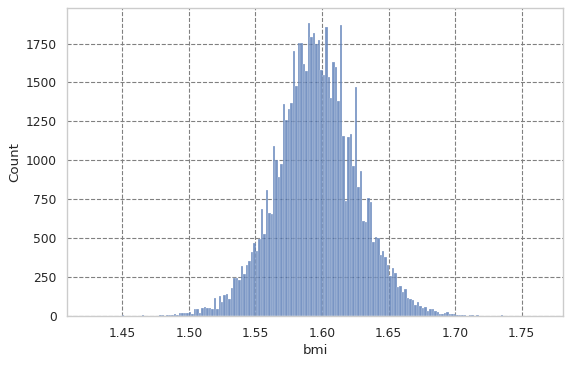

In [ ]:
# Select variables for the analysis
processed_dementia_data = raw_dementia_data[['age','isced1997_r', 'eurod', 'bmi', 
                            'ever_smoked', 'br015_', 'casp', 'chronic_mod',
                            'sp008_', 'cogscore']]

# Check how many cells are nans
print(processed_dementia_data.isna().sum().sum())

# Remove nans
processed_dementia_data = processed_dementia_data.dropna()

# Ensure nans were removed
print(processed_dementia_data.isna().sum().sum())

# Apply the Box Cox function to 'bmi' to correct right skeweness and print the lambda
processed_dementia_data['bmi'], lambda_param  = boxcox(processed_dementia_data['bmi'])

# Plot the processed bmi
plt.rcParams['figure.figsize'] = (8,5)
sns.set_theme(style="whitegrid")
plt.rc('grid', linestyle="--", color='grey')
plt.rc('figure', facecolor='white')
sns.histplot(processed_dementia_data['bmi'])
print('lambda_param', lambda_param)

# Change the name of the feature bmi, to remember it was scaled
processed_dementia_data = processed_dementia_data.rename(columns={'bmi': 'bmi_BC_preprc'})

In [ ]:
# Extract the target feature from the data
y = processed_dementia_data['cogscore']
y.info()

# Extract the features from the data
X = processed_dementia_data.drop('cogscore', axis=1)
X.info()


<class 'pandas.core.series.Series'>
Index: 67871 entries, 0 to 98347
Series name: cogscore
Non-Null Count  Dtype  
--------------  -----  
67871 non-null  float64
dtypes: float64(1)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 67871 entries, 0 to 98347
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            67871 non-null  float64
 1   isced1997_r    67871 non-null  float64
 2   eurod          67871 non-null  float64
 3   bmi_BC_preprc  67871 non-null  float64
 4   ever_smoked    67871 non-null  float64
 5   br015_         67871 non-null  float64
 6   casp           67871 non-null  float64
 7   chronic_mod    67871 non-null  float64
 8   sp008_         67871 non-null  float64
dtypes: float64(9)
memory usage: 5.2 MB


# Model Fitting and Tuning


### Helper functions

Initially, we integrated several helper functions to facilitate the examination of regression coefficients and assess the quality of the fits. The first function get_coefs extracts the intercept and coefficients from a regression model, whereas the second one model_fit returns the mean square error (MSE), the root mean square error (rMSE) and the R^2 value of the fitted model. If the boolean input plot = True then the latter function returns two graphs, (i) y predicted vs y and (ii) y predicted vs residuals.

In [ ]:
# Define helper functions
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])


def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(mean_squared_error(y, y_hat))
    Rsqr = r2_score(y, y_hat)
    
    Metrics = (round(MSE, 4), round(RMSE, 4), round(Rsqr, 4))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color='orange', data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res, alpha=0.5, color='royalblue').set_title("Actual vs Fitted plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res, alpha=0.5, color='royalblue').set_title("Fitted vs Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', colors='orange')
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE, Rsqr) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return Metrics


## Baseline Model

The linear regression model was selected as the baseline for our project for its simplicity and interpretability, providing a straightforward initial assessment of the relationships between features and the cognitive score. This choice allowed us to establish a foundational understanding of how each variable influences cognitive function in a linear context. Given the diverse range of variables within our dataset, linear regression offered a clear starting point to evaluate the direct impact of individual factors on cognitive scores. By beginning with this model, we could identify which variables had a linear correlation with cognitive outcomes and set a benchmark for the performance of more complex models. This approach not only aligned with statistical best practices but also ensured that any subsequent improvement in model performance, through non-linear models or feature engineering, could be clearly attributed to the added complexity.

In [ ]:
# Set seed
rng = np.random.seed(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

[['intercept' 17.5325]
 ['age' -0.118]
 ['isced1997_r' 0.85]
 ['eurod' -0.153]
 ['bmi_BC_preprc' -0.6665]
 ['ever_smoked' 0.0088]
 ['br015_' -0.1598]
 ['casp' 0.0732]
 ['chronic_mod' 0.0273]
 ['sp008_' -0.1259]]


Train set graphs:


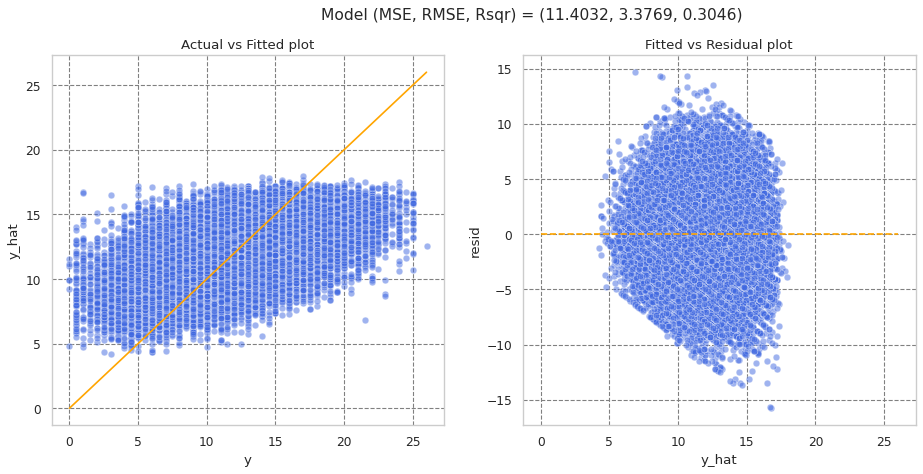

(11.4032, 3.3769, 0.3046)


Test set graphs:


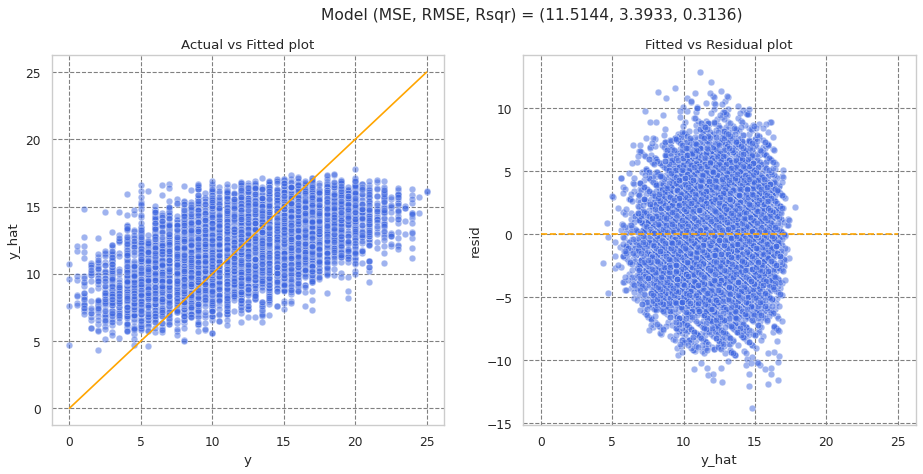

(11.5144, 3.3933, 0.3136)


In [ ]:
# Initialise the Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lm = lin_reg.fit(X_train, y_train)

print(np.c_[np.append(['intercept'],lm.feature_names_in_),np.round(get_coefs(lm),4)])
print('\n')
print('Train set graphs:')
print(model_fit(lm, X_train, y_train, plot=True))
print('\n')
print('Test set graphs:')
print(model_fit(lm, X_test, y_test, plot=True))

First of all, it is worth mentioning that the slopes of the features confirmed the trends earlier suspected:

    1. age: By each year of increase in age cognitive score is decreased by 0.118, with all other variables held constant.
    2. isced1997_r (0-6, 6 being the highest level of education): By each level of increase in education, cognitive score is increased by 0.85, with all other variables held constant.
    3. eurod: (0 - 12, 12 being very depressed): By each level of increase in depression, cognitive score is decreased by 0.153, with all other variables held constant.
    4. bmi-BC-preprc:  By each unit of increase in transformed 'bmi', cognitive score is decreased by 0.6665, with all other variables held constant.
    5. ever_smoked: If not ever smoked cognitive score is slightly increased by 0.0088, with all other variables held constant. It should be noted that this variable has close to no effect on the response.
    6. br015_ (rigorous activities: 1-4, 4 being the lowest level):  For each unit of increase in passiveness cognitive score decreases by 0.1598, with all other variables held constant.
    7. casp (life quality 12-48, with 48 being the best): For each unit of increase in life quality, cognitive score increases by 0.0732, with all other variables held constant.
    8.  chronic_mod (number of chronic diseases: 1-7): The result here is counter intuitive and contradicts the trend from the correlation, i.e. here with each increasing chronic disease the cognitive score increases by 0.0273, with all other variables held constant. This effect is close to 0.
    9. sp008_ (helps others outside household 1/5 = yes/no): if no, cognitive score is decreased by 0.1259, with all other variables held constant.

We also noted the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 value of the linear model. 

The MSE of 11.4502, RMSE  of 3.3838, and R^2 value of 0.3017 derived from the linear regression model offered insights into its performance. The MSE and RMSE are measures of the average error magnitude, with MSE being more sensitive to larger errors due to the squaring of the residuals. An RMSE of 3.3838 suggested that, on average, the model's predictions deviated from the actual values by approximately 3.38 points on the cognitive score scale, which may be a considerable margin depending on the clinical significance and range of the cognitive scores.

The R^2 value indicates the proportion of variance in the dependent variable that is explained by the regressors. An R^2 of 0.3017 meant that roughly 30% of the variability in cognitive scores could be explained by the model. In the context of predicting cognitive function, an R^2 of 0.3017 might be considered modest. Since cognitive function is influenced by a multitude of factors, some of which may not be captured fully by the data, it is not uncommon for social science models to have lower R-squared values.

For the goal of this study—to identify habits correlated with cognitive scores and infer the potential for systematic improvement—it's crucial to have a model that explains an improved proportion of variance in cognitive scores. The current R-squared value suggested there's room for improvement, possibly by incorporating additional relevant variables, accounting for non-linear relationships, or by employing different modelling techniques better suited to capture the complexity of the data.

With reference to the figures, the 'Actual vs Fitted' plot displays each actual target value from the test set against the model’s predicted value. It is a direct way to see how well the model's predictions matched the actual data. A good fit is indicated by the points lying close to the diagonal line. This plot can reveal biases in the model’s predictions, such as systematic overestimation or underestimation across the range of values. The 'Fitted vs Residual' plot is crucial for diagnosing potential problems with the model. It plots the predicted values against the residuals (the difference between the actual and predicted values). Ideally, the residuals should be randomly scattered around the horizontal line (indicating zero residual), without any discernible pattern. Patterns in this plot can indicate issues such as non-linearity, heteroscedasticity, or outliers.

In the fitted vs residual plot for the linear regression model, we observed an absence of residuals in the lower left quadrant, particularly beneath the line extending from point (0, 0) to approximately (15, -15). This pattern suggests that for lower cognitive scores, specifically those less than 15, the model has a tendency to predict higher than the actual scores—indicating an overestimation. Conversely, in the upper right quadrant, though less pronounced, there's a subtle pattern where for cognitive scores above 15, the model shows a tendency to underestimate, as seen by the residuals being mostly positive. These trends suggested the presence of a non-linear relationship between the predictor features and the cognitive score, warranting further exploration into more complex modelling techniques that can capture such non-linearity. It is worth mentioning that standardizing the data was explored at this point, but did not yield improved results, meaning that the weak points of the benchmark model were not related to features scaling.

It was decided to plot the features vs the actual and fitted cogscore for the test set, to further investigate underlying trends and model limitations.

Text(0.5, 1.05, 'Linear regression: Test sets vs fitted values')

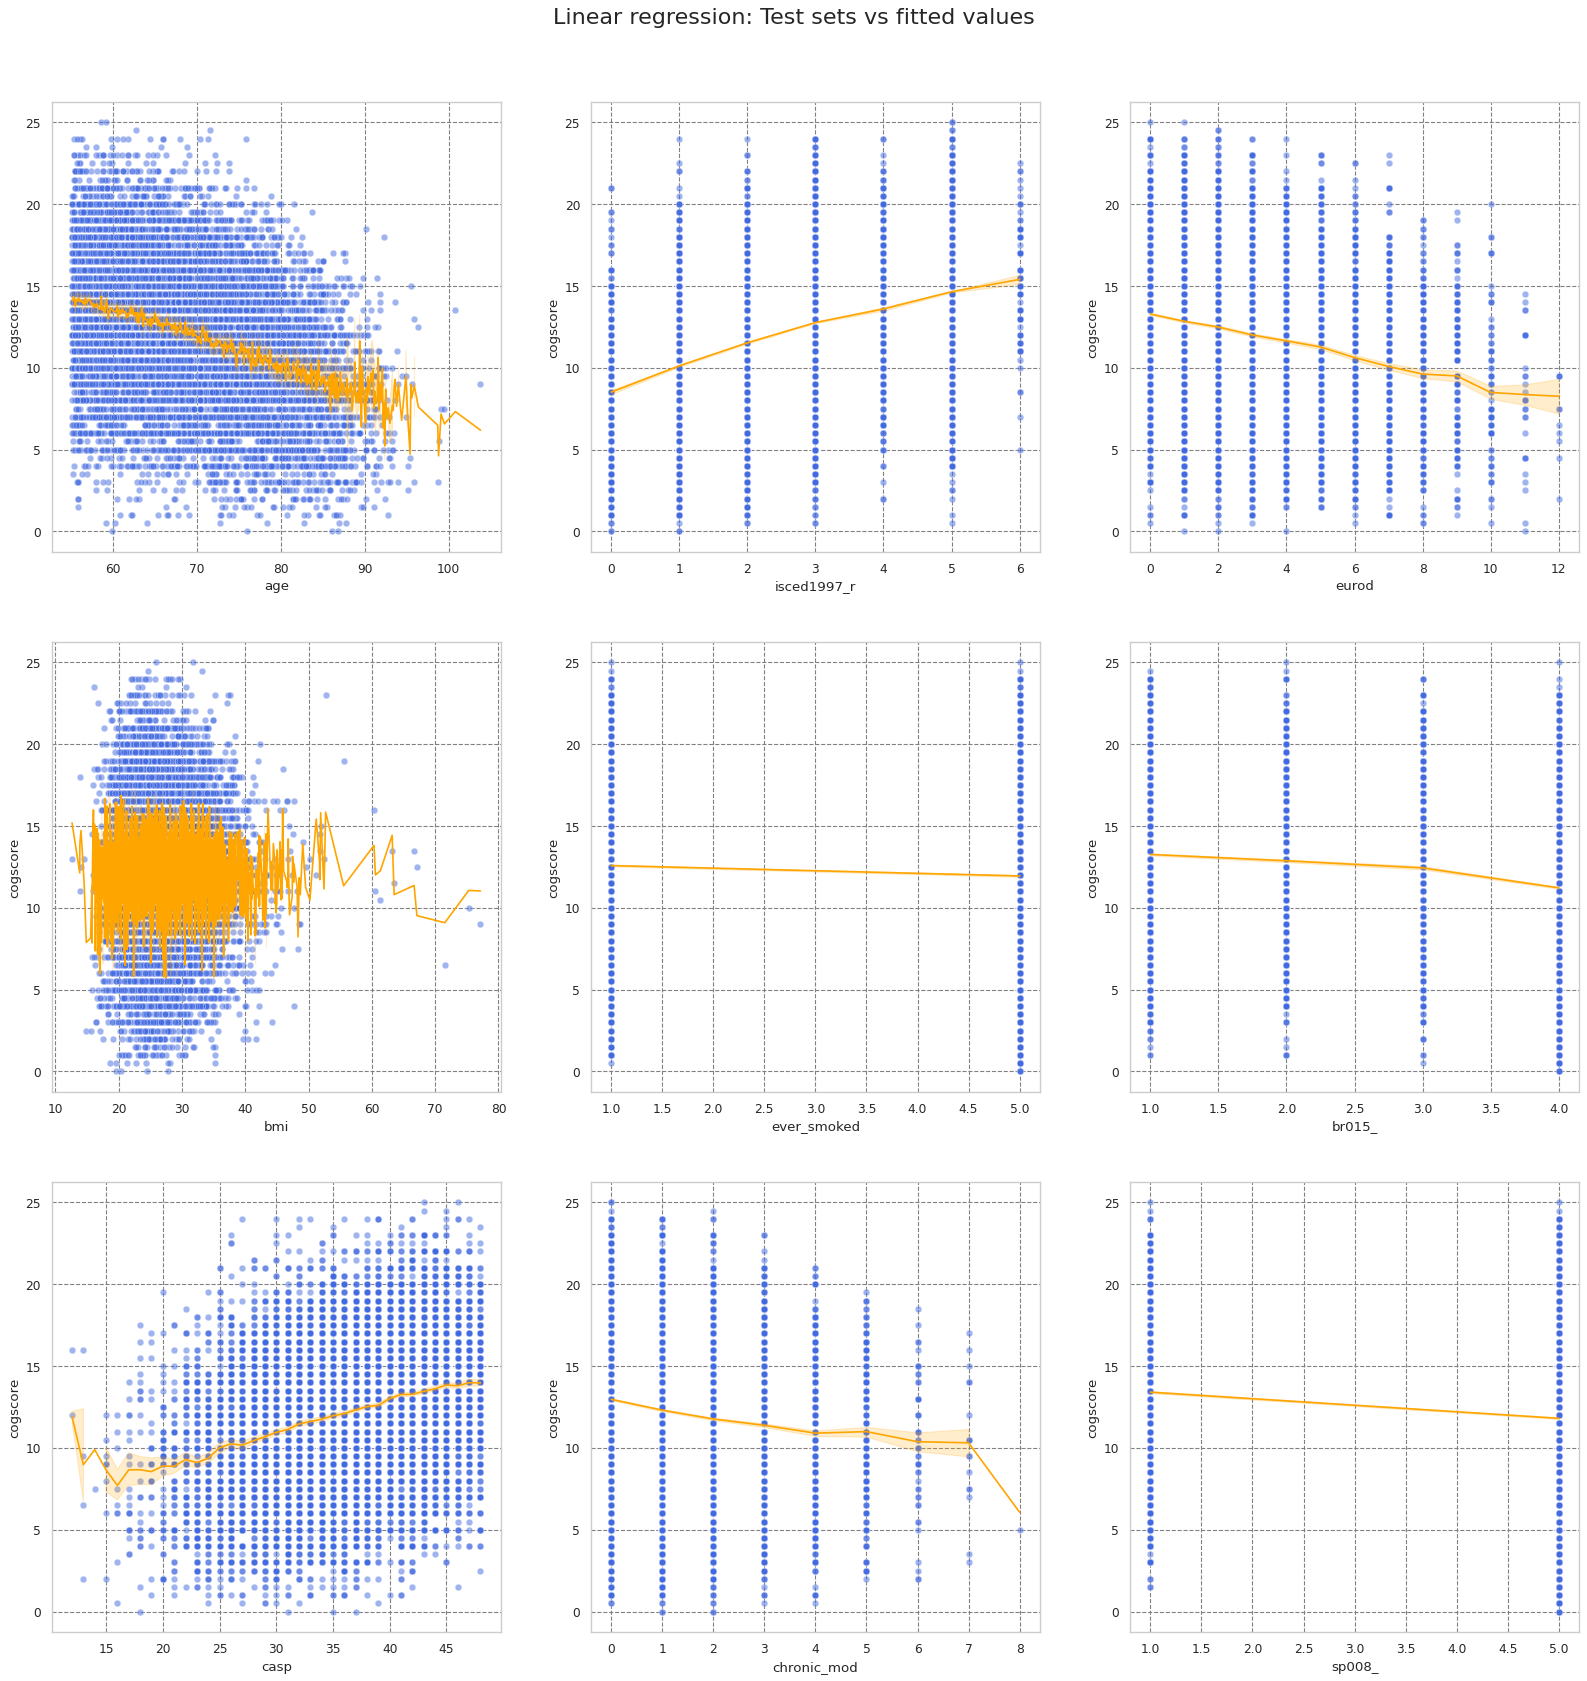

In [ ]:
# Calculate the fitted values for the test set
yhat_lin = lm.predict(X_test)

# Plot the test set and the fitted lines
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(X.columns):

    # Reverse Box-Cox the bmi
    X_plotted = X_test[feature]
    if feature == 'bmi_BC_preprc':
        X_plotted = (lambda_param * X_test[feature] + 1) ** (1 / lambda_param)

    # Plot the actual data
    sns.scatterplot(x=X_plotted, y=y_test, ax=axes[i], alpha=0.5, color='royalblue')
    
        # y_plotted = (lambda_param * yhat_lin + 1) ** (1 / lambda_param)

    # Plot the fitted line
    sns.lineplot(x=X_plotted, y=yhat_lin, ax=axes[i], color='orange')
    
    # Set the labels for each subplot
    axes[i].set_ylabel('cogscore')
    if feature != 'bmi_BC_preprc':
        axes[i].set_xlabel(feature)
    else:
        axes[i].set_xlabel('bmi')

# Adjust layout to prevent overlap
plt.tight_layout()

# Set the space between graphs
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Insert title
plt.suptitle('Linear regression: Test sets vs fitted values', fontsize=20, y = 1.05)

The individual feature actual vs fitted values plots are valuable for examining the relationship each feature has with the target variable as the model sees it. By examining these plots for different features, we can understand how each contributes to the model's predictions, and whether the form of the relationship makes sense given our understanding of the data and the problem domain.

The plots showed distinct patterns that could indicate varying relationships with cognitive score. For instance, the plot for age showed a clear negative trend, implying that cognitive score tends to decrease with age, which was consistent with expectations. However, the variability increased with age, suggesting heteroscedasticity.

The plot for levels of education (isced1997_r) displayed a positive association with cognitive score, aligning with the understanding that higher education levels may be protective against cognitive decline, while eurod, representing the depression scale, inversely correlated with cognitive score, reinforcing the notion that higher depression scores may be linked to lower cognitive score. Moreover, a strong increasing relationship was present between the life quality variable casp and cognitive score.

It was interesting to notice the highly oscillating behavior of bmi vs cogscore, possibly denoting high variance or overfitting until BMI = 50 and then a decreasing trend for higher BMI values. For the variables related to smoking habits, rigorous activities, chronic diseases and offering services outside household (ever_smoked, br015_, chronic_mod and sp008, respectively) the plots appeared relatively flatter, indicating a weaker or less clear relationship with cognitive score.

Note: BMI was reverse transformed here to improve interpetability (it was earlier Box-Cox transformed).

## Final Model

A variety of different models were tried to improve the quality of the fit. These included spline and polynomial regression, along with regularization techniques such as ridge regression, lasso regression, and elastic net regression. Polynomial regression emerged as the superior model, outperforming the others in both MSE and R^2.  The performance of linear regression with spline columns transformation was second best, and then the optimized alpha (penalty term) ridge method followed closely. The optimized lasso regression's alpha converged to zero, implying that it could not perform better than the linear regression, and the best MSE and R^2 of elastic net were close to the ridge's, which was expected as the optimal lasso weight went to 0. Subsequently, we decided to present the polynomial regression model, fine-tuned to the optimal degree, as our chosen approach.

Note: While we experimented with models incorporating Principal Component Analysis (PCA), we ultimately opted against using them. Despite their improved statistical metrics, models with PCA obscure the direct relationships between specific variables and cognitive score. For our goal of identifying actionable risk factors for cognitive function, the interpretability provided by models using non-reduced dimension variables is crucial.

At this step, the polynomial model was built and its degree was optimized for minimizing the mean square error of the predictions in the test set.

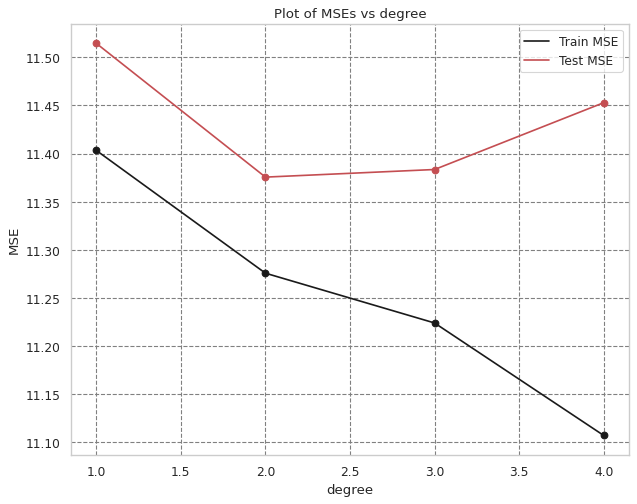

In [ ]:
# Initialise vector of degrees and train/test metrics
degree = range(1,5)
test_mse = np.array([])
train_mse = np.array([])

for d in degree:

    # Define a pipeline for polynomial regression
    p = Pipeline([
        ('poly', PolynomialFeatures(degree=d,include_bias=False)),
        ('regression', LinearRegression())
    ])

    m = p.fit(X_train,y_train)

    yhat = m.predict(X_train)
    ypred = m.predict(X_test)
    
    test_mse = np.append(test_mse, mean_squared_error(y_test, ypred))
    train_mse = np.append(train_mse, mean_squared_error(y_train, yhat))


fig, ax = plt.subplots(figsize=(9,7), ncols=1, nrows=1)
plt.scatter(degree,train_mse, color='k')
plt.plot(degree,train_mse, color='k', label='Train MSE')
plt.scatter(degree,test_mse, color='r')
plt.plot(degree,test_mse, color='r', label='Test MSE')
ax.legend()
ax.set_xlabel('degree')
ax.set_ylabel('MSE')
plt.title('Plot of MSEs vs degree')
plt.show()


The 'MSE vs Degree' plot is particularly useful for determining the optimal complexity of a polynomial regression model. It shows how well the model is fitting the training data (train MSE) and how well it generalizes to unseen data (test MSE) at different degrees of polynomials. The goal is to find a balance where the test MSE is at its lowest, as this indicates good generalization, while avoiding overfitting, which is suggested by a divergence between the training and test MSE.

The plot of MSE against polynomial degree indicated a clear trend: the MSE for the training set decreased as the polynomial degree increased, suggesting a better fit to the training data, potentially at the risk of overfitting. Notably, while the training MSE decreased consistently, the test MSE minimized and then began to increase beyond the second degree. This uptick in test MSE is a classic sign of overfitting, where the model begins to capture noise in the training data that does not generalize to unseen data. Therefore, second-order polynomials were identified as the optimal degree for the model, balancing the fit and generalizability.

Train set graphs:


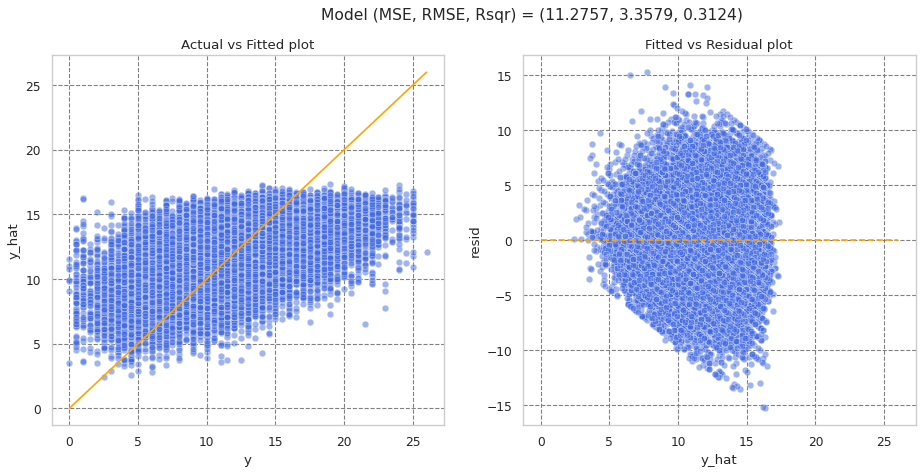

Polynomial regression model (MSE, RMSE, R2) = (11.2757, 3.3579, 0.3124)


Test set graphs:


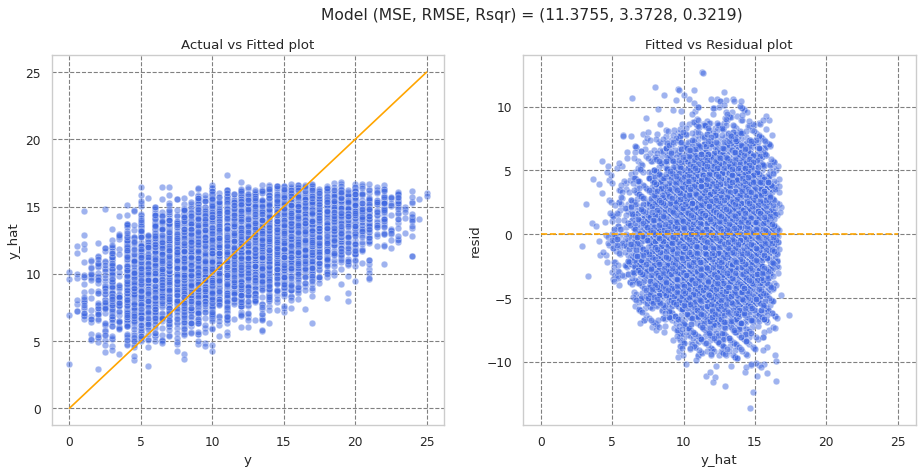

Polynomial regression model (MSE, RMSE, R2) = (11.3755, 3.3728, 0.3219)


In [ ]:
# Build the pipeline for polynomial regression again, this time with the optimized degree
p = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', LinearRegression())
])

# Fit the model with the train data
m = p.fit(X_train, y_train)

# Evaluate performance
print('Train set graphs:')
print('Polynomial regression model (MSE, RMSE, R2) =', model_fit(p, X_train, y_train, plot = True))
print('\n')
print('Test set graphs:')
print('Polynomial regression model (MSE, RMSE, R2) =', model_fit(p, X_test, y_test, plot = True))

The second-degree polynomial fit seemed to capture the variability in the data better than the linear fit, as suggested by the slight increase in R^2 (0.3136 to 0.3219 for the test set) and the slight decrease in MSE (11.5144 to 11.3755 for the test set) and RMSE (3.3933 to 3.3728 for the test set). This marginal improvement suggested that while the second-degree polynomial fit may capture more complexity than the linear model, there might still be further room for improvement through more complex models (beyond the current stage of the course).

For the train set, the same patterns of overestimated low cogscore values and underestimated higher cogscore values were still present and are only slightly improved, see the first actual vs fitted and fitted vs residual figures.

For the test set, the distribution of residuals in the second-degree polynomial model remained centered around zero, similar to the linear model, indicating a good model fit. There is, however, evidence of heteroscedasticity — the variance of the residuals seemed to increase with the fitted values, which could be a sign that the model still did not fully capture the predictive structure of the data. This is not uncommon in life sciences.

Next, the individual features actual vs fitted plots were explored for the test set which was fitted fit to the polynomial regression.

Text(0.5, 1.05, 'Polynomial regression: Test sets vs fitted values')

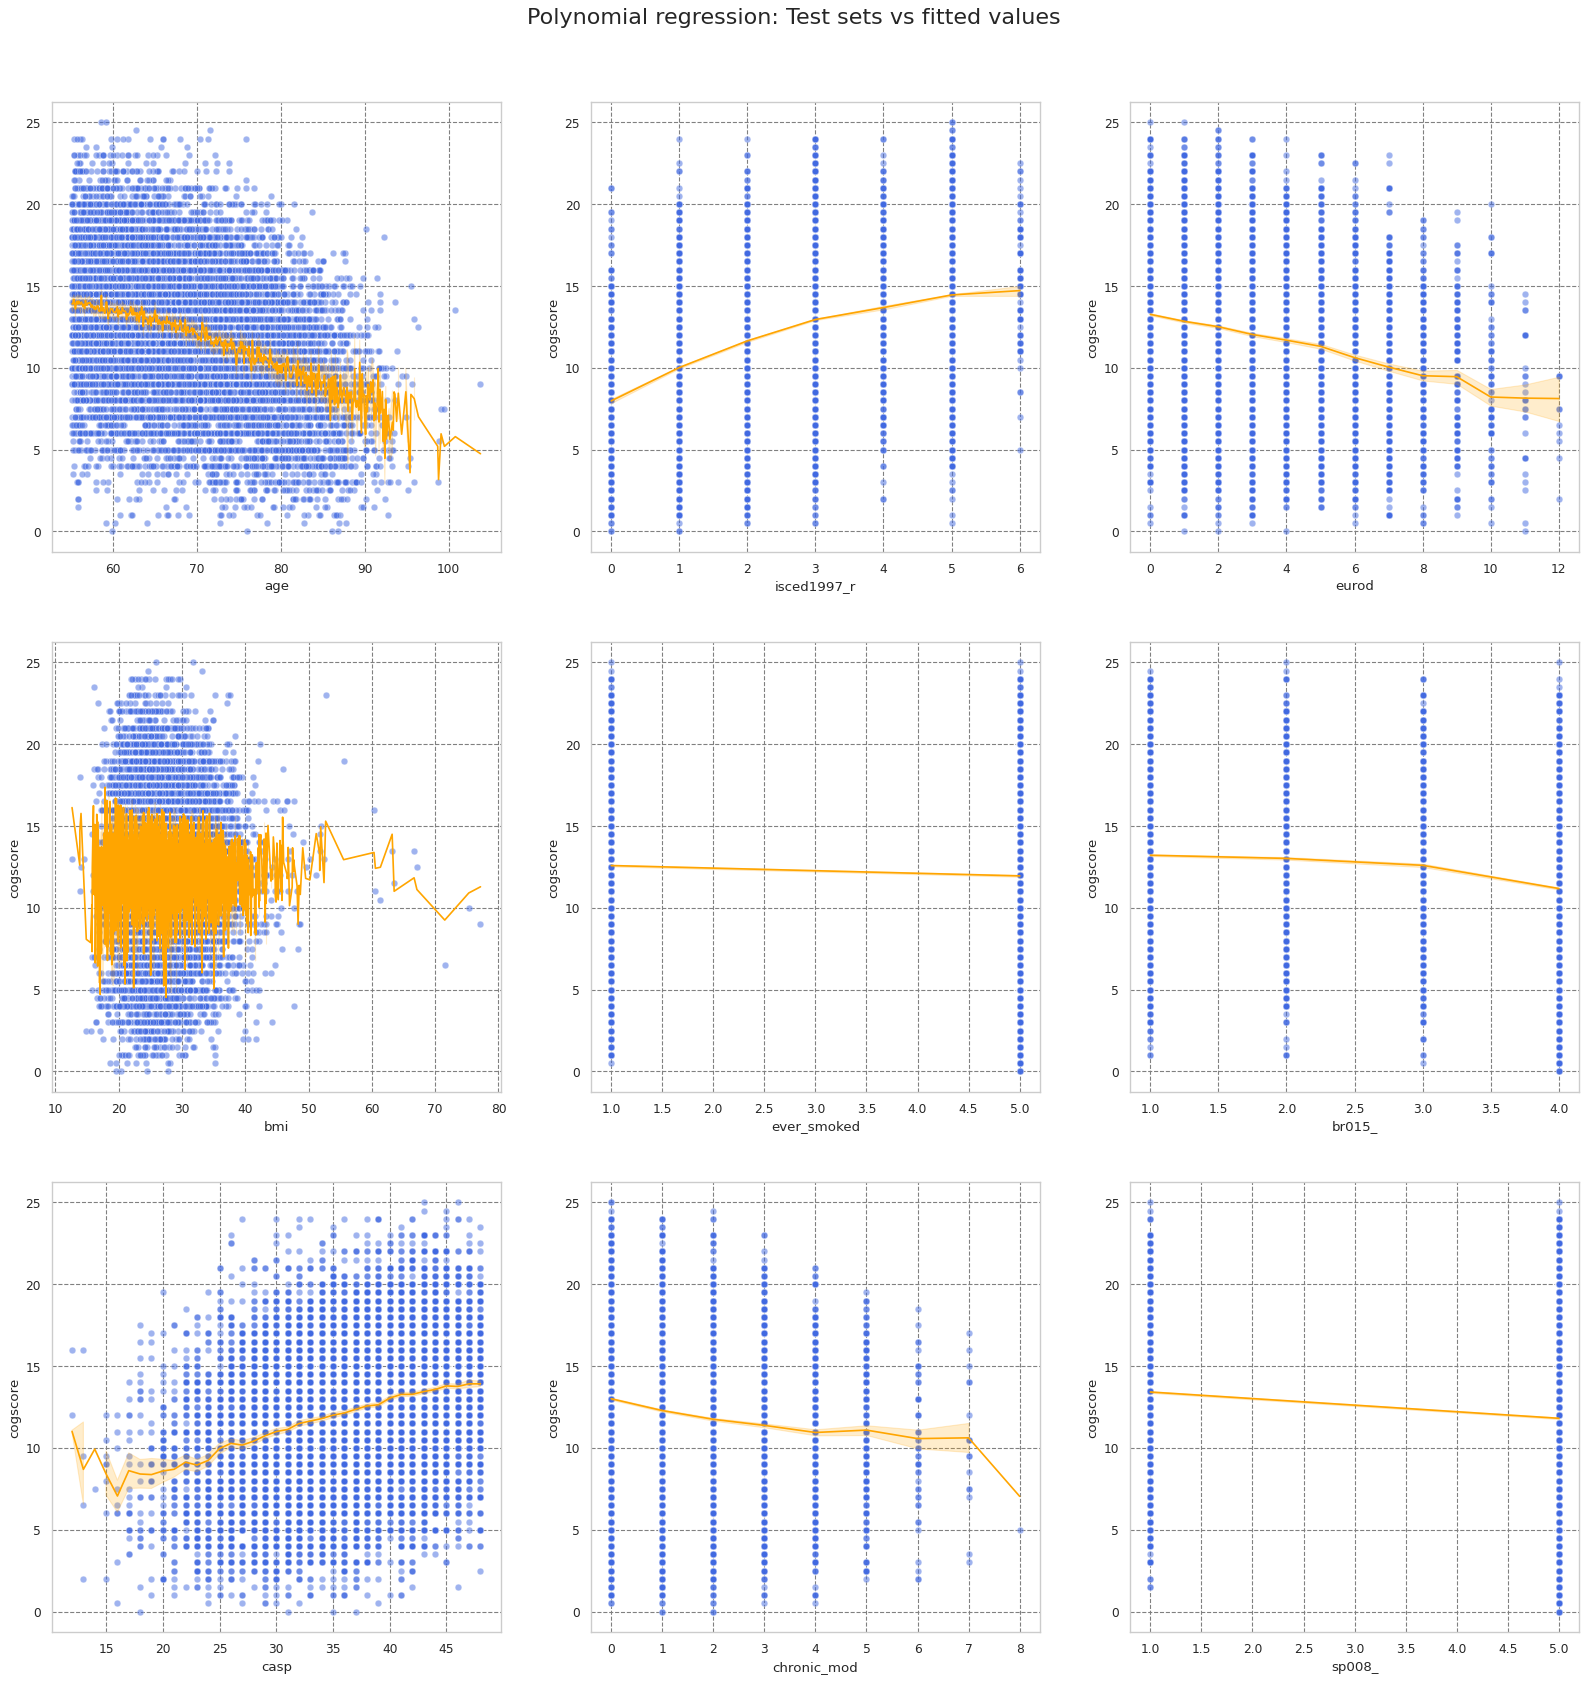

In [ ]:
# Calculate the fitted values for the test set
yhat_poly = p.predict(X_test)

# Plot the test set and the fitted lines
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(X.columns):

    # Reverse Box-Cox the bmi
    X_plotted = X_test[feature]
    if feature == 'bmi_BC_preprc':
        X_plotted = (lambda_param * X_test[feature] + 1) ** (1 / lambda_param)

    # Plot the actual data
    sns.scatterplot(x=X_plotted, y=y_test, ax=axes[i], alpha=0.5, color='royalblue')
       
    # Plot the fitted line
    sns.lineplot(x=X_plotted, y=yhat_poly, ax=axes[i], color='orange')
    
    # Set the labels for each subplot
    axes[i].set_ylabel('cogscore')
    if feature != 'bmi_BC_preprc':
        axes[i].set_xlabel(feature)
    else:
        axes[i].set_xlabel('bmi')

# Adjust layout to prevent overlap
plt.tight_layout()

# Set the space between graphs
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Insert title
plt.suptitle('Polynomial regression: Test sets vs fitted values', fontsize=20, y = 1.05)

Iterating here the individual features actual vs fitted plots helped visualize the effect of each feature on the prediction after accounting for the model's complexity, such as non-linear transformations. 

Age vs Cognitive Score: The fit across ages showed that the polynomial model adjusted to the curvature in the data. However, as the variance increased with age, it might suggest that there is more variability that the model does not capture as age increases, such as other factors.

Education Level (isced1997_r) vs Cognitive Score: The polynomial model showed that as the education level increases, cognitive score increases. This may be due to more educated people coming from wealthier families, on average but also on the effect of mental labour in keeping one's mind healthy.

Depression Scale (eurod) vs Cognitive Score: The fitted line curved downwards as the depression scale increased, which confirmed the negative impact of higher depression levels on cognitive score.

Life Quality (casp) vs Cognitive Score: As observations density increased (casp > 18), there was a clear increasing trend between life quality level and cognitive score.

BMI vs Cognitive Score: A polynomial fit here illustrated how BMI impacted cognitive score in a non-linear fashion, capturing thresholds beyond which BMI had an accelerated negative impact (> 50 BMI), but being non conclusive for lower values, due to its highly oscillating behavior with regards to cognitive score. Note: BMI was reversely transformed from its earlier Box-Cox transformation.

Cognitive Score vs Smoking (ever_smoked), Chronic Diseases Number (chronic_mod), Rigorous Activities (br015_) and Contribution to Community (sp008_). For these binary and transformed categorical variables much less subtle trends were present in the case of the polynomial regression model as well. The indications here were that a person with higher level of rigorous activities and social contribution and lower amount of chronic diseases, could have perhaps a marginally better cognitive score performance. No inference could be made with regards to smoking as its trend was almost flat. The weak trends, especially in binary variables, could be justified by the low inference capability of the available observations to interpret cognitive score and perhaps from the low capability of the polynomial regression model to combine binary with categorical and continuous data (even standardized in other version the authors tried), in predicting cognitive score.

# Discussion & Conclusions


The MSE, RMSE, and R^2 values for the second-degree polynomial model are closely comparable to those of the linear regression model previously discussed. The MSE of 11.3755 and RMSE of 3.3728 for the test set indicate the average squared error and the standard deviation of the residuals, respectively. With these values being marginally higher than those of the linear model, it suggests a slight increase in the average error of predictions.

The R-squared value of 0.3219, a modest increase from the linear model (0.3136), suggests that the second-degree polynomial model explains approximately 32.19% of the variance in cognitive scores. This is a small but notable improvement in the model's explanatory power and indicates that the addition of polynomial terms has captured more of the complexities in the relationships between variables and the target feature.

In practical terms, using a second-degree polynomial model might indicate that the relationship between certain habits or health metrics and cognitive score is more complex than simply 'more of X leads to a higher or lower score.' For example, it might capture a scenario where moderate levels of a certain behaviour are optimal, but too much or too little are both associated with lower cognitive scores. This kind of insight is valuable when designing interventions or policies to support cognitive health.

In the context of this study, where the goal was to identify and understand the factors that are most predictive of cognitive score as a proxy for dementia risk, these metrics indicated an incremental improvement with the polynomial model over the simple linear model. However, the modest size of these improvements suggested that, while the second-degree polynomial terms added value, they may not have captured all the nonlinearities present in the data. Further exploration of different types of models (as for instance the logistic regression which is more appropriate for classification) could potentially reveal more about the underlying relationships. The key is to balance the complexity of the model with the ability to generalize to new data, avoiding overfitting while still capturing the essential patterns.

In our predictive modeling of cognitive scores as a proxy for dementia risk, we utilized an array of variables that overlap with those highlighted in the comprehensive study by Livingston et al. [2], yet with notable distinctions in methodology and scope. While Livingston's study provided an extensive overview of modifiable risk factors for dementia, our project focused more narrowly on quantifiable data such as education level, physical activity, and health-related behaviors. Unlike the broad strategies for dementia risk reduction outlined by Livingston, which included policy-level and individual interventions—ranging from air pollution reduction to the management of hypertension—our approach was strictly quantitative, modeling direct correlations within a dataset.

The variables we analyzed and found significant, like education and depression scales, resonated with Livingston's findings; however, our modeling could not accommodate the more nuanced, context-dependent factors such as excessive alcohol consumption, traumatic brain injury, and air pollution due to data constraints. Furthermore, the depth and breadth of Livingston's research, underpinned by a wealth of evidence, contrasted with our study's computational data-driven approach, which was limited by the dataset available to us.

Based on the relationships observed in our model, we recommend prioritizing education as a long-term societal intervention to enhance cognitive scores, which aligns with the protective effect against dementia risk. It is reasonable to assume that the more people are educated, the better equipped they are to make intelligent decisions about their health - both cognitively and physically. Governmental policies should also support and promote mental health resources to address depression and encourage an active lifestyle, considering the positive association between physical activity and cognitive function. On an individual level, maintaining a healthy BMI and engaging in regular mental and social activities could be beneficial. These recommendations aim to support the overall well-being of individuals, potentially reducing the risk of dementia.

In summary, our study complemented Livingston's work by offering a data-centric perspective on some of the risk factors identified, using statistical models to estimate their association with cognitive scores. It underscored the importance of education and mental health in cognitive function, in alignment with the risk factors emphasized by Livingston. Yet, it also acknowledged the limitations of not capturing all potential variables due to dataset constraints and the narrower focus of our modeling compared to the broader epidemiological research presented in their paper.

# References

[1] Börsch-Supan, A. & S. Gruber (2020): easySHARE. Release version: 8.0.0. SHARE-ERIC. Dataset. doi: 10.6103/SHARE.easy.800

[2] Livingston, Gill, et al. “Dementia prevention, intervention, and care: 2020 report of The Lancet Commission.” The Lancet, vol. 396, no. 10248, Aug. 2020, pp. 413–446, https://doi.org/10.1016/s0140-6736(20)30367-6. 

[3] Esther Heerema, MSW. “What Does Oriented X1, X2, X3 and X4 Mean in Dementia?” Verywell Health, Verywell Health, 7 Oct. 2022, www.verywellhealth.com/what-is-orientation-and-how-is-it-affected-by-dementia-98571. 

[4] Professional, Cleveland Clinic medical. “Cognitive Test: What It Is, Different Types & Results.” Cleveland Clinic, my.clevelandclinic.org/health/articles/22306-cognitive-test. Accessed 10 Mar. 2024. 

[5] “How Should I Assess a Person with Suspected Dementia?” NICE, cks.nice.org.uk/topics/dementia/diagnosis/assessment/. Accessed 10 Mar. 2024. 

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project1_blank.ipynb

[NbConvertApp] WARNING | pattern 'project1_blank.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4271589c-0190-4b94-b091-d44151e37777' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>